Đinh Ngọc Ân - SE171386

In [1]:
import cv2
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

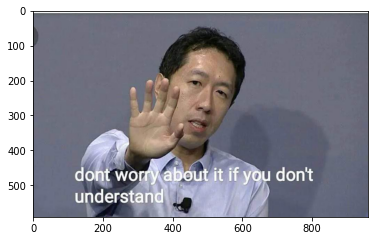

In [2]:
img = cv2.cvtColor(cv2.imread('image.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

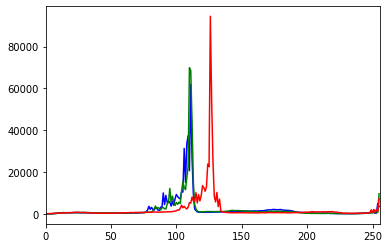

In [3]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [4]:
@interact(r=(0,255), g=(0,255),b=(0,255))
def ab(r=0,g=0,b=0):
    rr,gg,bb = cv2.split(img)
    rr += r
    gg += g
    bb += b
    plt.imshow(cv2.merge((rr,gg,bb)))

interactive(children=(IntSlider(value=0, description='r', max=255), IntSlider(value=0, description='g', max=25…

In [20]:
def median_filter(img, kernel_size = 7):
  padded_img = np.pad(img, [(kernel_size -1) // 2, (kernel_size - 1) // 2], mode='edge')

  filtered_img = np.zeros_like(img)

  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      window = padded_img[row:row + kernel_size, col:col + kernel_size]

      filtered_img[row,col] = np.median(window)
  return filtered_img

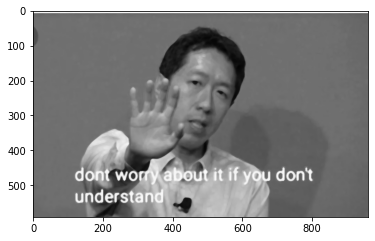

In [22]:
filtered_img = median_filter(img)
plt.imshow(filtered_img)

In [6]:
@interact(k=(1,20))
def ab(k=1):
    blur = cv2.blur(img,(k,k))
    plt.figure().set_figwidth(15)
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(blur),plt.title('Mean filter')
    plt.xticks([]), plt.yticks([])
    plt.show()


interactive(children=(IntSlider(value=1, description='k', max=20, min=1), Output()), _dom_classes=('widget-int…

In [9]:
gray_img = np.mean(cv2.imread('image.png'),-1)
equ = cv2.equalizeHist(gray_img)
res = np.hstack((gray_img,equ)) #stacking images side-by-side

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [8]:
gray_img = np.mean(cv2.imread('image.png'),-1)
plt.show(gray_img)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()